# KaggleX BIPOC Mentorship Program Cohort 2022 

### AFRICA FOOD PRODUCTION AND SUPPLY EXPLORATORY DATA ANALYSIS PROJECT BY FLORENCE O. EGHWRUDJE

> #### **Introduction**
Africa is a continent with immense potential for food production and supply improvement. With the right strategies in place, Africa can become self-sufficient in its food supply while also providing an abundance of nutritious foods to the rest of the world. 

> #### **Project Aims**
The project seeks to evaluate three datasets, namely: Food Production, Food Supply and Africa Population, in order to gather insights on the Africa food production and supply trends with visualizations that can assist the continent of Africa's policy makers in making suitable decisions in guaranteeing food security in Africa.

> #### **Project Description**
Using data to make informed decisions about Africa' food production and supply.

> #### **Data Source**
Data was sourced from Kaggle (https://www.kaggle.com/datasets/emmanuelonuoha/africas-food-production-and-supply-2004-2013 and the World Bank open source data on population from 1960 to 2021 (https://data.worldbank.org/indicator/SP.POP.TOTL)

> #### **Problem**
How has the food production and food supply improved in Africa? 


> #### **Questions**

  >What is Africa food production trend overtime?

  >What are the top 10 Africa most produced food?

  >What country has the most food produced in Africa?

  >What country has the most food supplied in Africa?


> #### **Use Case**
Agriculture



##### Connecting to the Dataset for the project

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Necessary libraries the project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

#Dataset File Paths
#/content/drive/MyDrive/My KaggleX Final Project/Africa Food Production.csv
#/content/drive/MyDrive/My KaggleX Final Project/Africa Food Supply.csv
#/content/drive/MyDrive/My KaggleX Final Project/API_SP.POP.TOTL_DS2_en_csv_v2_4770387.csv

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Data Wrangling

In [ ]:
# Loading dataset
Afri_food_prod = pd.read_csv('/content/drive/MyDrive/My KaggleX Final Project/Africa Food Production.csv')

In [ ]:
Afri_food_prod

Country                Item  Year  Value
0       Algeria  Wheat and products  2004   2731
1       Algeria  Wheat and products  2005   2415
2       Algeria  Wheat and products  2006   2688
3       Algeria  Wheat and products  2007   2319
4       Algeria  Wheat and products  2008   1111
...         ...                 ...   ...    ...
23105  Zimbabwe         Crustaceans  2009      0
23106  Zimbabwe         Crustaceans  2010      0
23107  Zimbabwe         Crustaceans  2011      0
23108  Zimbabwe         Crustaceans  2012      0
23109  Zimbabwe         Crustaceans  2013      0

[23110 rows x 4 columns]

In [ ]:
#Dataset Information
Afri_food_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


**Observations:**

There are currently 2 columns with integer data types and 2 columns with object types. I observe that the data columns for Year and Value are seen as integers. There are 23110 data entries

In [ ]:
#Satistical Description of the Dataset 
Afri_food_prod.describe()

Year         Value
count  23110.000000  23110.000000
mean    2008.498269    327.785201
std        2.871740   1607.940343
min     2004.000000      0.000000
25%     2006.000000      3.000000
50%     2008.000000     18.000000
75%     2011.000000    108.000000
max     2013.000000  54000.000000

In [ ]:
Afri_food_prod['Country'].describe()

count                           23110
unique                             45
top       United Republic of Tanzania
freq                              790
Name: Country, dtype: object

In [ ]:
Afri_food_prod['Item'].describe()

count                       23110
unique                         94
top       Milk - Excluding Butter
freq                          450
Name: Item, dtype: object

In [ ]:
Afri_food_prod['Year'].describe()

count    23110.000000
mean      2008.498269
std          2.871740
min       2004.000000
25%       2006.000000
50%       2008.000000
75%       2011.000000
max       2013.000000
Name: Year, dtype: float64

In [ ]:
Afri_food_prod['Value'].describe()

count    23110.000000
mean       327.785201
std       1607.940343
min          0.000000
25%          3.000000
50%         18.000000
75%        108.000000
max      54000.000000
Name: Value, dtype: float64

Check the statistical summary of the data. What is the minimum, average, and maximum of each of the parameters

In [ ]:
#Transposing the dataset
Afri_food_prod.T

0                   1                   2      \
Country             Algeria             Algeria             Algeria   
Item     Wheat and products  Wheat and products  Wheat and products   
Year                   2004                2005                2006   
Value                  2731                2415                2688   

                      3                   4                   5      \
Country             Algeria             Algeria             Algeria   
Item     Wheat and products  Wheat and products  Wheat and products   
Year                   2007                2008                2009   
Value                  2319                1111                2953   

                      6                   7                   8      \
Country             Algeria             Algeria             Algeria   
Item     Wheat and products  Wheat and products  Wheat and products   
Year                   2010                2011                2012   
Value                  2605                2555                3432   

                      9      ...        23100        23101        23102  \
Country             Algeria  ...     Zimbabwe     Zimbabwe     Zimbabwe   
Item     Wheat and products  ...  Crustaceans  Crustaceans  Crustaceans   
Year                   2013  ...         2004         2005         2006   
Value                  3299  ...            0            0            0   

               23103        23104        23105        23106        23107  \
Country     Zimbabwe     Zimbabwe     Zimbabwe     Zimbabwe     Zimbabwe   
Item     Crustaceans  Crustaceans  Crustaceans  Crustaceans  Crustaceans   
Year            2007         2008         2009         2010         2011   
Value              0            0            0            0            0   

               23108        23109  
Country     Zimbabwe     Zimbabwe  
Item     Crustaceans  Crustaceans  
Year            2012         2013  
Value              0            0  

[4 rows x 23110 columns]

In [ ]:
#Checking for missing values
Afri_food_prod.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [ ]:
#Checking for duplicates
Afri_food_prod.duplicated().sum()

0

Observation: There are no missing values in the food production dataset

In [ ]:
#Checking for unique values from each of the features of the dataset
Afri_food_prod.nunique()

Country      45
Item         94
Year         10
Value      2134
dtype: int64

In [ ]:
#Data Cleanining
Afri_food_prod['Year'] = pd.to_datetime(Afri_food_prod['Year'], format="%Y").dt.year


In [ ]:
#Creating a unit column containing the symbol of kilotone in the Value coloumn
Afri_food_prod['Unit'] = 'kt'


In [ ]:
Afri_food_prod.head()

Country                Item  Year  Value Unit
0  Algeria  Wheat and products  2004   2731   kt
1  Algeria  Wheat and products  2005   2415   kt
2  Algeria  Wheat and products  2006   2688   kt
3  Algeria  Wheat and products  2007   2319   kt
4  Algeria  Wheat and products  2008   1111   kt

In [ ]:
#Checking for the data info
Afri_food_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
 4   Unit     23110 non-null  object
dtypes: int64(2), object(3)
memory usage: 902.9+ KB


In [ ]:
#Grouping data by Country and Year to show the total value of products for different years
FoodProd = Afri_food_prod.groupby(['Country', 'Year'])
FoodProd.head()

Country                Item  Year  Value Unit
0       Algeria  Wheat and products  2004   2731   kt
1       Algeria  Wheat and products  2005   2415   kt
2       Algeria  Wheat and products  2006   2688   kt
3       Algeria  Wheat and products  2007   2319   kt
4       Algeria  Wheat and products  2008   1111   kt
...         ...                 ...   ...    ...  ...
22515  Zimbabwe                Oats  2009      1   kt
22516  Zimbabwe                Oats  2010      1   kt
22517  Zimbabwe                Oats  2011      1   kt
22518  Zimbabwe                Oats  2012      1   kt
22519  Zimbabwe                Oats  2013      1   kt

[2250 rows x 5 columns]

In [ ]:
#Grouping data by Country, Year and Value to show the total number of values of item produced in each country for each year
Afri_food_prod.groupby(['Country','Year'])['Value'].sum()

Country   Year
Algeria   2004    15536
          2005    15667
          2006    16417
          2007    14763
          2008    13841
                  ...  
Zimbabwe  2009     5754
          2010     6777
          2011     7551
          2012     8173
          2013     7914
Name: Value, Length: 450, dtype: int64

#Exploratory Data Analysis


> Analyzing the trend of food production in Africa.




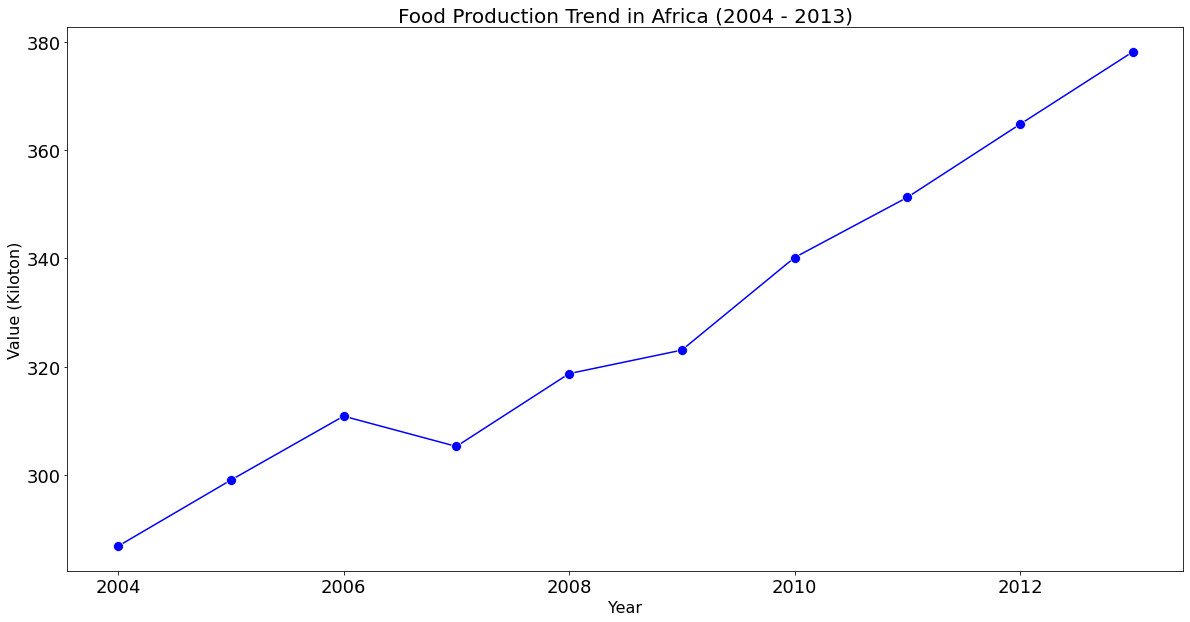

In [ ]:
#Data visualization of the food production trend over time in Africa
plt.figure(figsize=[20,10])
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
sns.lineplot(data=Afri_food_prod, x="Year", y="Value", marker='o', markersize=10, ci=None, color='b')
plt.title("Food Production Trend in Africa (2004 - 2013)", fontsize=20);
plt.xlabel('Year', fontsize=16)
plt.ylabel('Value (Kiloton)', fontsize=16);


**Bivariate Analysis**

Exploring the Year and Value variables and provide observations on their distributions

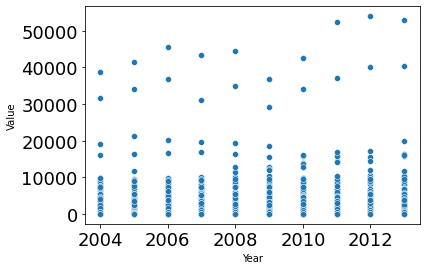

In [ ]:
sns.scatterplot(data=Afri_food_prod,x='Year', y='Value');

In [ ]:
#Data visualization of Africa food production trend over time using Histogram plot
px.histogram(Afri_food_prod, x='Year', y='Value', color ='Year', title = 'Africa Food Production Trend Over time (2004 - 2013)',
            labels = {'Year': 'Year', 'Value':'Value (Kiloton)'})

#### The trend of food production in Africa has been on a steady incline over the past few decades as seen in the plot above. However, there was production decrease in 2007 and thereafter an increase in 2008 up to 2013.


In [ ]:
#Considering those nations whose food production has increased the most
Afri_food_prod.groupby(['Country'])['Value'].sum().sort_values(ascending=False)

Country
Nigeria                        1628030
Egypt                           877498
South Africa                    579592
Ethiopia                        350693
United Republic of Tanzania     332802
Sudan                           301584
Ghana                           295004
Uganda                          278421
Morocco                         271821
Kenya                           256872
Cameroon                        197670
Angola                          195499
Algeria                         188650
Cote d'Ivoire                   182486
Mozambique                      157584
Malawi                          153717
Madagascar                      133071
Burkina Faso                    100129
Rwanda                           95174
Tunisia                          92713
Mali                             92292
Benin                            88072
Niger                            86808
Zambia                           82701
Zimbabwe                         73316
Guinea           

In [ ]:
#Data visualization of Africa food production with line plot
plt.figure(figsize=(10,10))
Afri_food_production_plot = px.line(Afri_food_prod, x=Afri_food_prod['Year'],y=Afri_food_prod['Value'],
                          color=Afri_food_prod['Country'],
                          title ='Africa Food Production by Country (2004-2013)',
                          labels = {'Year': 'Year', 'Value':'Value (Kiloton)'})
Afri_food_production_plot.update_layout(yaxis_type='log')
Afri_food_production_plot

<Figure size 720x720 with 0 Axes>

In [ ]:
#Data visualization of Africa food production with chloropleth map
fig = px.choropleth(
            locations = Afri_food_prod['Country'],
            locationmode = 'country names',
            hover_name= Afri_food_prod['Country'],
            color=Afri_food_prod['Value'],
            color_continuous_scale=px.colors.sequential.solar,
            animation_frame= Afri_food_prod['Year'],
            
)
fig.update_layout(title_text = 'Africa Food Production by Country (2004-2013)')
fig


In [ ]:
#Data visualization of Africa food production with Animation

fig = px.bar(Afri_food_prod, 
             x ="Country", 
             y ="Value", 
             color ='Value',
             animation_frame ='Year',
             hover_name ='Country',
             title = 'Africa Food Production by Country',
             labels = {'Year': 'Year', 'Value':'Value (Kiloton)'})
fig.show()

### From the above interactive line animation plots, we see that Nigeria, Egypt and South Africa were the top three food producing country in Africa between year 2004 to 2013.

### On the other hand, Lesotho, Cabo Verde, Sao Tome and Djibouti were the countries that produced the least food.



In [ ]:
#Data visualization of Africa food production with Animation

fig = px.bar(Afri_food_prod, 
             x ="Country", 
             y ="Item", 
             color ='Value',
             animation_frame ='Year',
             hover_name ='Country',
             title = 'Africa Food Production by Item',
             labels = {'Year': 'Year', 'Value':'Value (Kiloton)'})
fig.show()

#### Observation: 
From the above bar plot, it shows that Nigeria has the highest food production by Item as indicated in yellow with a value of 38845 kiloton of Cassava and products in 2004 and as indicated in orange with a value of 31776 kiloton of yam in 2004.


In [ ]:
#Africa food products/items that were produced the most

In [ ]:
Afri_most_produced_food = pd.DataFrame(Afri_food_prod.groupby('Item')['Value'].sum().sort_values(ascending = False)).reset_index()[:10]
Afri_most_produced_food

Item    Value
0     Cassava and products  1118948
1               Sugar cane   887008
2       Maize and products   574948
3                     Yams   511523
4        Vegetables, Other   410403
5  Milk - Excluding Butter   380380
6     Sorghum and products   241080
7       Wheat and products   229875
8     Beverages, Fermented   227037
9    Potatoes and products   221092

In [ ]:
#Data visualization of Africa most produced food items with line plot
px.line(Afri_food_prod, x='Item', y= 'Value', labels = {'Item': 'Item', 'Value':'Value (Kiloton)'},
        title = 'Africa various Produced Food Items')

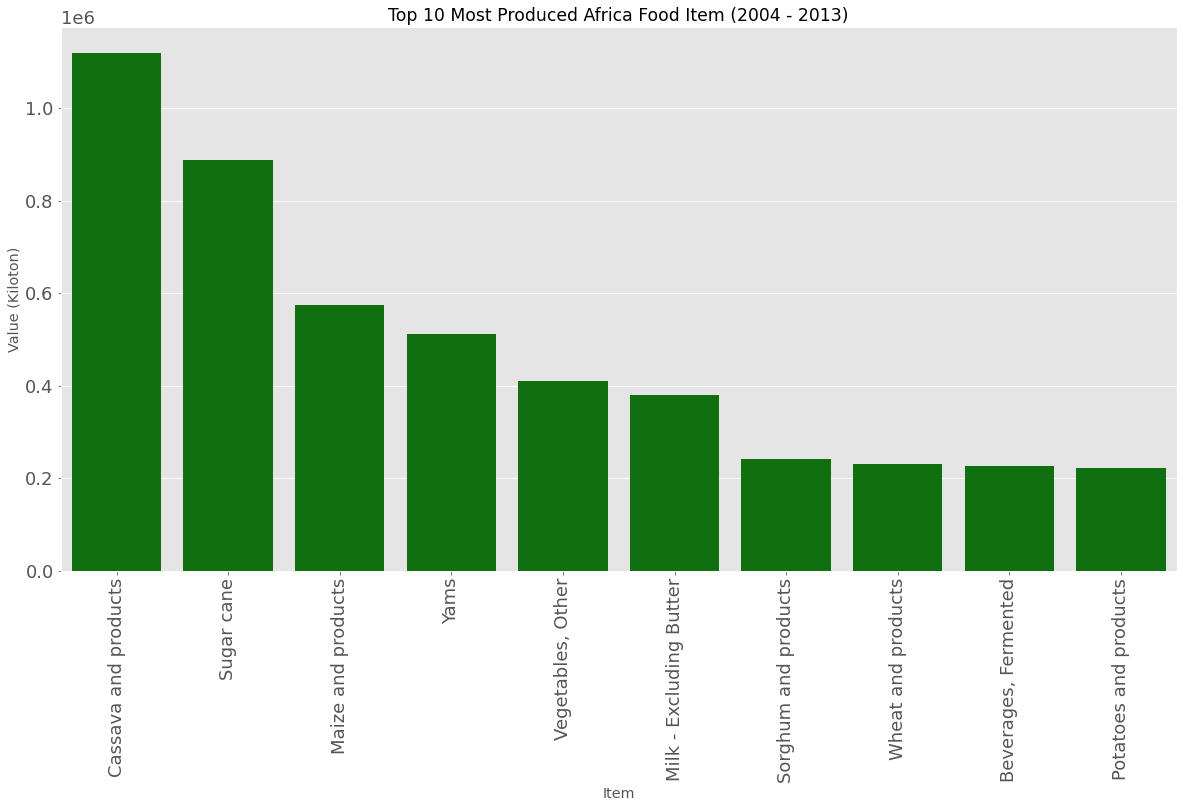

In [ ]:
#Data visualization of Africa most produced food items with Bar plot
plt.style.use("ggplot")
plt.rc('font', size=12)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)

#figure and plot
plt.rcParams['figure.figsize'] = (20, 10)
sns.barplot(y = Afri_most_produced_food.Value, x = Afri_most_produced_food.Item, data = Afri_most_produced_food, color = 'g')
plt.gca().set_title("Top 10 Most Produced Africa Food Item (2004 - 2013)")
plt.ylabel('Value (Kiloton)')
plt.xlabel('Item')
plt.xticks(rotation=90)
plt.show();

### From the above line and barplot shows that the top 10 most produced food in Africa between 2004 and 2013 are Cassava, Sugar Cane, Maize and products like, Yam, Vegtables, Milk (excluding butter), Sorghum and Products, Wheat and Products, Beverages, Fermented and Potatoes.

### Africa Least produce products/items 

In [ ]:
#Creating a dataframe of Africa least produced food items
Afri_least_produced_food = pd.DataFrame(Afri_food_prod.groupby('Item')['Value'].sum().sort_values(ascending = False)).reset_index()[11:]
Afri_least_produced_food

Item   Value
11     Tomatoes and products  172192
12  Rice (Milled Equivalent)  156775
13       Millet and products  155193
14                   Bananas  153785
15            Sweet potatoes  145694
..                       ...     ...
89                    Cloves     249
90           Molluscs, Other     214
91                    Pepper     199
92           Fish, Liver Oil      28
93   Aquatic Animals, Others      13

[83 rows x 2 columns]

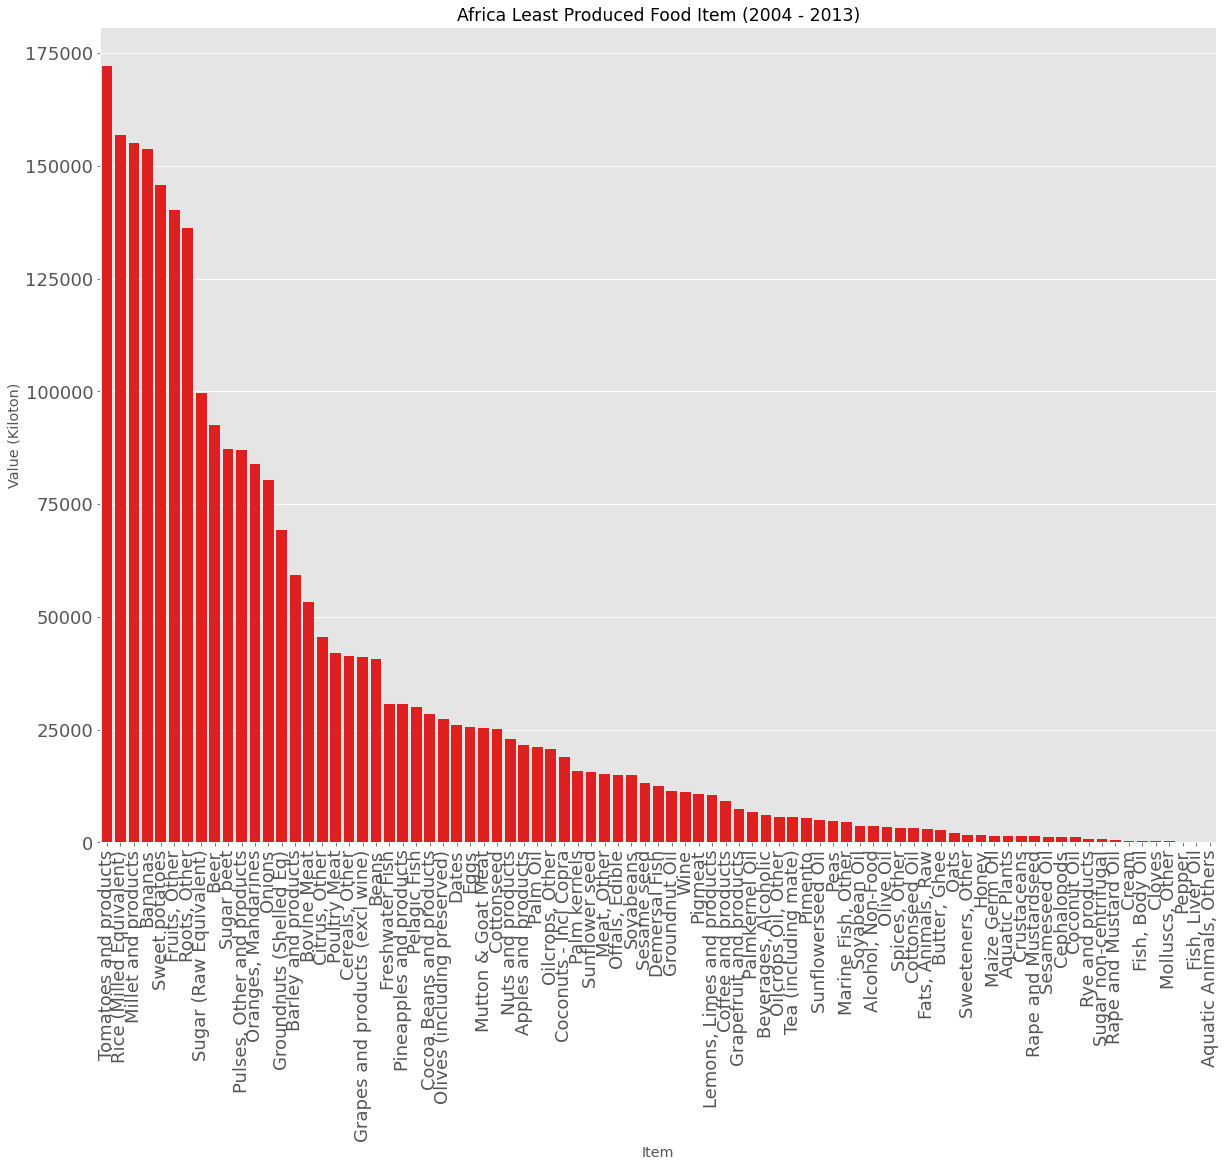

In [ ]:
#Data visualization of Africa least produced food items with Bar plot

#color palette
color = sns.color_palette()[0]

#label sizes for axes, xtick and ytick
plt.style.use("ggplot")
plt.rc('font', size=12)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)

# set the figure and plot
plt.rcParams['figure.figsize'] = (20, 15)
sns.barplot(y = Afri_least_produced_food.Value, x = Afri_least_produced_food.Item, data = Afri_least_produced_food, color='r')
plt.gca().set_title("Africa Least Produced Food Item (2004 - 2013)")
plt.xlabel('Item')
plt.ylabel('Value (Kiloton)')
plt.xticks(rotation=90)
plt.show();


In [ ]:
#Africa top 10 least produced food items
Afri_least_produced_food = pd.DataFrame(Afri_food_prod.groupby('Item')['Value'].sum().sort_values(ascending = False)).reset_index()[11:21]
Afri_least_produced_food

Item   Value
11     Tomatoes and products  172192
12  Rice (Milled Equivalent)  156775
13       Millet and products  155193
14                   Bananas  153785
15            Sweet potatoes  145694
16             Fruits, Other  140167
17              Roots, Other  136266
18    Sugar (Raw Equivalent)   99546
19                      Beer   92630
20                Sugar beet   87130

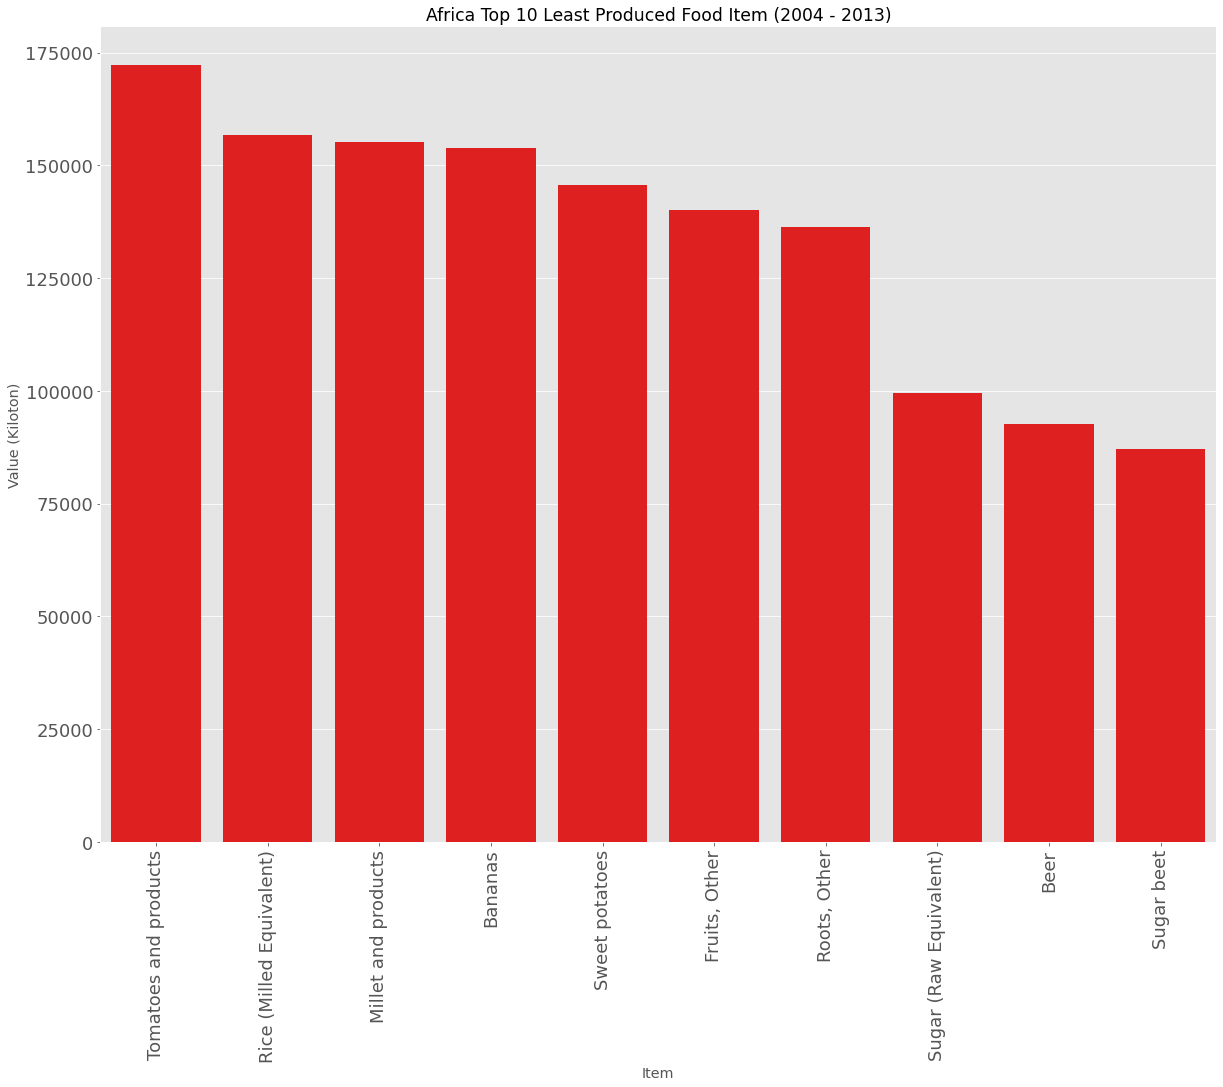

In [ ]:
#Data visualization of Africa Top 10 least produced food items with Bar plot

#color palette
color = sns.color_palette()[0]

#label sizes for axes, xtick and ytick
plt.style.use("ggplot")
plt.rc('font', size=12)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)

# set the figure and plot
plt.rcParams['figure.figsize'] = (20, 15)
sns.barplot(y = Afri_least_produced_food.Value, x = Afri_least_produced_food.Item, data = Afri_least_produced_food, color='r')
plt.gca().set_title("Africa Top 10 Least Produced Food Item (2004 - 2013)")
plt.xlabel('Item')
plt.ylabel('Value (Kiloton)')
plt.xticks(rotation=90)
plt.show();


### Observation: From the above barplot shows that the top 10 least produced food in Africa between 2004 and 2013 are Tomatoes, Rice, Millet, Bananas, Sweet potatoes, Fruits, Roots, Sugar, Beer and Sugar beet

### Checking for outliers


In [ ]:
#Statistical description of food production dataset
Afri_food_prod.describe()


Year         Value
count  23110.000000  23110.000000
mean    2008.498269    327.785201
std        2.871740   1607.940343
min     2004.000000      0.000000
25%     2006.000000      3.000000
50%     2008.000000     18.000000
75%     2011.000000    108.000000
max     2013.000000  54000.000000

In [ ]:
#Average food production
Afri_food_prod.mean()


Year     2008.498269
Value     327.785201
dtype: float64

In [ ]:
#Median food production
Afri_food_prod.median()

Year     2008.0
Value      18.0
dtype: float64

In [ ]:
#25% quratile of Africa yearly food production value 
fp_Q1 = Afri_food_prod.quantile(0.25)
fp_Q1


Year     2006.0
Value       3.0
Name: 0.25, dtype: float64

In [ ]:
#75% quratile of Africa yearly food production value 
fp_Q3 = Afri_food_prod.quantile(0.75)
fp_Q3


Year     2011.0
Value     108.0
Name: 0.75, dtype: float64

In [ ]:
#(IQR) interquatile range
fp_Q3 = 108.0
fp_Q1 = 3.0
fp_IQR = fp_Q3 - fp_Q1
fp_IQR

105.0

In [ ]:
#Upper fence value
fp_upper_fence = fp_Q3 + ( 1.5 * fp_IQR)
fp_upper_fence


265.5

In [ ]:
#Lower fence value
fp_lower_fence = fp_Q1 -( 1.5 * fp_IQR)
fp_lower_fence

-154.5

In [ ]:
#Checking for outliers
Afri_food_prod[Afri_food_prod.Value < (fp_Q1 - (1.5 * fp_IQR))].any()

Country    False
Item       False
Year       False
Value      False
Unit       False
dtype: bool

In [ ]:
Afri_food_prod[Afri_food_prod.Value > (fp_Q1 + (1.5 * fp_IQR))].any()



Country    True
Item       True
Year       True
Value      True
Unit       True
dtype: bool

In [ ]:
Afri_food_prod[Afri_food_prod.Value < (fp_Q1 - (1.5 * fp_IQR))]

Empty DataFrame
Columns: [Country, Item, Year, Value, Unit]
Index: []

###Note: 

1. Determining whether any country's value in the food production data is less than the lower fence
2. Determining whether any country's value in the statistics on food production is higher than the upper fence
3. Nothing appeared when the countries whose values are below the lower fence were checked.

In [ ]:
#Converting results that displayed the outlier countries into a dataframe
Afri_outlier_countries = pd.DataFrame(Afri_food_prod[Afri_food_prod.Value > (fp_Q1 + (1.5 * fp_IQR))])
Afri_outlier_countries

Country                     Item  Year  Value Unit
0       Algeria       Wheat and products  2004   2731   kt
1       Algeria       Wheat and products  2005   2415   kt
2       Algeria       Wheat and products  2006   2688   kt
3       Algeria       Wheat and products  2007   2319   kt
4       Algeria       Wheat and products  2008   1111   kt
...         ...                      ...   ...    ...  ...
23085  Zimbabwe  Milk - Excluding Butter  2009    389   kt
23086  Zimbabwe  Milk - Excluding Butter  2010    396   kt
23087  Zimbabwe  Milk - Excluding Butter  2011    400   kt
23088  Zimbabwe  Milk - Excluding Butter  2012    410   kt
23089  Zimbabwe  Milk - Excluding Butter  2013    410   kt

[4830 rows x 5 columns]

In [ ]:
#Unique names of Africa outlier countries
Afri_outlier_countries['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Burkina Faso', 'Cameroon',
       'Central African Republic', 'Chad', 'Congo', "Cote d'Ivoire",
       'Egypt', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Kenya', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Swaziland', 'Togo', 'Tunisia', 'Uganda',
       'United Republic of Tanzania', 'Zambia', 'Zimbabwe'], dtype=object)

In [ ]:
#Number of Africa countries that are outliers
Afri_outlier_countries['Country'].nunique()


39

There are 39 countries out of the 45 countries which are outliers in the food production dataset because their values are higher than the upper fence value.


In [ ]:
#Data visualization of Africa outlier countries with box plot
px.box(Afri_outlier_countries, x = 'Country', y = 'Value', title = 'Box plot of Africa Food Production Outliers',
        labels = {'Country': 'Country', 'Value':'Value (kcal/person/day)'})

As seen above, Algeria, Angola, Benin, Burkina Faso, Cameroon,Central African Republic, Chad, Congo, Cote d'Ivoire, Egypt, Ethiopia, Gabon, Ghana, Guinea, Guinea-Bissau, Kenya, Liberia, Madagascar, Malawi, Mali, Mauritania, Mauritius, Morocco, Mozambique, Namibia, Niger, Nigeria, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Swaziland, Togo, Tunisia, Uganda, United Republic of Tanzania, Zambia, Zimbabwe have consistently produced high amount of food between 2004 and 2013.


###Getting insights into the Africa Food Supply Dataset

In [ ]:
Afri_food_supply = pd.read_csv('/content/drive/MyDrive/My KaggleX Final Project/Africa Food Supply.csv')

In [ ]:
Afri_food_supply

Country  Year  Value
0     Algeria  2004   2987
1     Algeria  2005   2958
2     Algeria  2006   3047
3     Algeria  2007   3041
4     Algeria  2008   3048
..        ...   ...    ...
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110

[450 rows x 3 columns]

In [ ]:
Afri_food_supply.info()
#data contains 450 samples and 3 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [ ]:
Afri_food_supply.describe()

Year        Value
count   450.000000   450.000000
mean   2008.500000  2469.775556
std       2.875478   379.140143
min    2004.000000  1781.000000
25%    2006.000000  2174.000000
50%    2008.500000  2376.000000
75%    2011.000000  2681.750000
max    2013.000000  3561.000000

In [ ]:
Afri_food_supply.isnull().sum()


Country    0
Year       0
Value      0
dtype: int64

In [ ]:
Afri_food_supply.duplicated().sum()

0

In [ ]:
# Inspect data for missing values
Afri_food_supply.isna()

Country   Year  Value
0      False  False  False
1      False  False  False
2      False  False  False
3      False  False  False
4      False  False  False
..       ...    ...    ...
445    False  False  False
446    False  False  False
447    False  False  False
448    False  False  False
449    False  False  False

[450 rows x 3 columns]

In [ ]:
Afri_food_supply.nunique()

Country     45
Year        10
Value      373
dtype: int64

In [ ]:
Afri_food_supply.T

0        1        2        3        4        5        6    \
Country  Algeria  Algeria  Algeria  Algeria  Algeria  Algeria  Algeria   
Year        2004     2005     2006     2007     2008     2009     2010   
Value       2987     2958     3047     3041     3048     3110     3142   

             7        8        9    ...       440       441       442  \
Country  Algeria  Algeria  Algeria  ...  Zimbabwe  Zimbabwe  Zimbabwe   
Year        2011     2012     2013  ...      2004      2005      2006   
Value       3217     3272     3296  ...      2044      2025      2115   

              443       444       445       446       447       448       449  
Country  Zimbabwe  Zimbabwe  Zimbabwe  Zimbabwe  Zimbabwe  Zimbabwe  Zimbabwe  
Year         2007      2008      2009      2010      2011      2012      2013  
Value        2109      2094      2147      2168      2200      2197      2110  

[3 rows x 450 columns]

In [ ]:
Afri_food_supply.isna().sum()

Country    0
Year       0
Value      0
dtype: int64

In [ ]:
Afri_food_supply['Year'].nunique()

10

In [ ]:
Afri_food_supply['Value'].nunique()

373

In [ ]:
Afri_food_supply['Country'].nunique()

45

In [ ]:
Afri_food_supply['Year'] = pd.to_datetime(Afri_food_prod['Year'], format="%Y").dt.year


In [ ]:
Afri_food_supply.T


0        1        2        3        4        5        6    \
Country  Algeria  Algeria  Algeria  Algeria  Algeria  Algeria  Algeria   
Year        2004     2005     2006     2007     2008     2009     2010   
Value       2987     2958     3047     3041     3048     3110     3142   

             7        8        9    ...       440       441       442  \
Country  Algeria  Algeria  Algeria  ...  Zimbabwe  Zimbabwe  Zimbabwe   
Year        2011     2012     2013  ...      2004      2005      2006   
Value       3217     3272     3296  ...      2044      2025      2115   

              443       444       445       446       447       448       449  
Country  Zimbabwe  Zimbabwe  Zimbabwe  Zimbabwe  Zimbabwe  Zimbabwe  Zimbabwe  
Year         2007      2008      2009      2010      2011      2012      2013  
Value        2109      2094      2147      2168      2200      2197      2110  

[3 rows x 450 columns]

In [ ]:
Afri_food_supply.head()

Country  Year  Value
0  Algeria  2004   2987
1  Algeria  2005   2958
2  Algeria  2006   3047
3  Algeria  2007   3041
4  Algeria  2008   3048

In [ ]:
#Creating a unit column cntaining the symbol of kilotone, which is the unit of the numbers in the Value column
Afri_food_supply['Unit'] = 'kcal/person/day'

In [ ]:
Afri_food_supply.head(10)


Country  Year  Value             Unit
0  Algeria  2004   2987  kcal/person/day
1  Algeria  2005   2958  kcal/person/day
2  Algeria  2006   3047  kcal/person/day
3  Algeria  2007   3041  kcal/person/day
4  Algeria  2008   3048  kcal/person/day
5  Algeria  2009   3110  kcal/person/day
6  Algeria  2010   3142  kcal/person/day
7  Algeria  2011   3217  kcal/person/day
8  Algeria  2012   3272  kcal/person/day
9  Algeria  2013   3296  kcal/person/day

In [ ]:
Afri_food_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
 3   Unit     450 non-null    object
dtypes: int64(2), object(2)
memory usage: 14.2+ KB


In [ ]:
Afsupply = Afri_food_supply.groupby(['Country', 'Year'])
Afsupply.head()

Country  Year  Value             Unit
0     Algeria  2004   2987  kcal/person/day
1     Algeria  2005   2958  kcal/person/day
2     Algeria  2006   3047  kcal/person/day
3     Algeria  2007   3041  kcal/person/day
4     Algeria  2008   3048  kcal/person/day
..        ...   ...    ...              ...
445  Zimbabwe  2009   2147  kcal/person/day
446  Zimbabwe  2010   2168  kcal/person/day
447  Zimbabwe  2011   2200  kcal/person/day
448  Zimbabwe  2012   2197  kcal/person/day
449  Zimbabwe  2013   2110  kcal/person/day

[450 rows x 4 columns]

##Exploratory Data Analysis

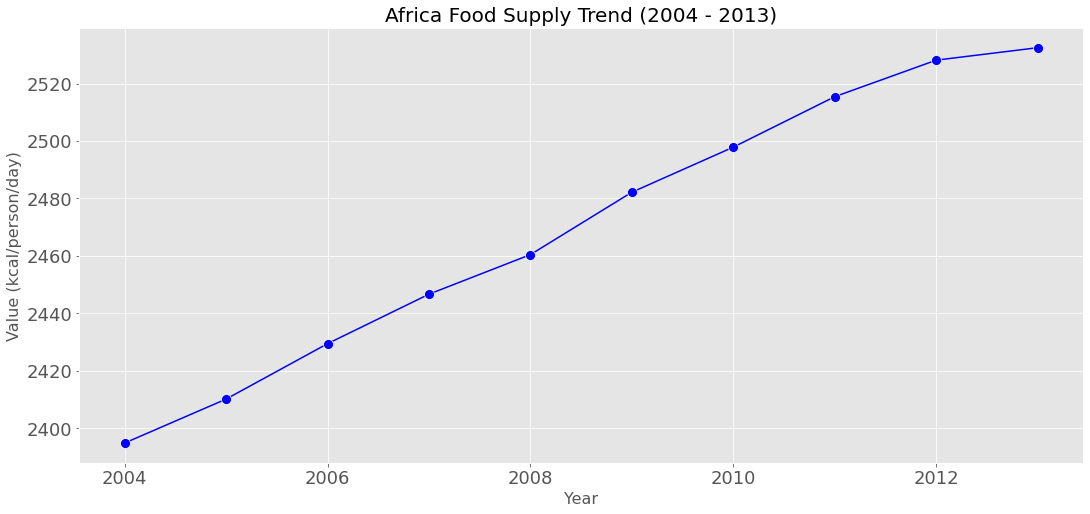

In [ ]:
#Data visualization of Africa food supply trend over time with line plot
plt.figure(figsize=[18,8])

#label sizes for axes, xtick and ytick
plt.rc('font', size=15)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)

sns.lineplot(data=Afri_food_supply, x="Year", y="Value", marker='o', markersize=10, ci=None, color='b')
plt.title("Africa Food Supply Trend (2004 - 2013)", fontsize=20)
plt.ylabel('Value (kcal/person/day)', fontsize = 16)
plt.xlabel('Year', fontsize=16);

In [ ]:
#Data visualization of Africa food supply trend over time with Histogram plot
Afri_food_supply_trend = pd.DataFrame(Afri_food_supply.groupby(['Year', 'Country', 'Value'], as_index=False)['Value'].mean())

In [ ]:
px.histogram(Afri_food_supply_trend, x='Year', y='Value', color ='Year', title = 'Africa Food Supply Trend Over time (2004 - 2013)',
            labels = {'Year': 'Year', 'Value':'Value (kcal/person/day)'})

###From the observation above there has been an increase in food supply in Africa between 2004 and 2013 as the year increases.

In [ ]:
#Countries with the most supplied food
Afri_food_supply.groupby(['Country'])['Value'].sum().sort_values(ascending=False)


Country
Egypt                          34580
Tunisia                        33055
Morocco                        32967
Algeria                        31118
Mauritius                      30543
South Africa                   29629
Ghana                          29180
Cote d'Ivoire                  27666
Mali                           27502
Mauritania                     27443
Gabon                          27299
Nigeria                        26988
Burkina Faso                   26072
Gambia                         25695
Lesotho                        25588
Cabo Verde                     25514
Benin                          25378
Guinea                         25180
Niger                          25024
Cameroon                       24603
Sao Tome and Principe          24462
Djibouti                       24165
Senegal                        23784
Togo                           23339
Sudan                          23238
Swaziland                      23171
Guinea-Bissau                 

In [ ]:
#Data visualization of Africa Food Supply Trend with line plot
plt.figure(figsize=(10,10))
Afri_food_supply_plot = px.line(Afri_food_supply, x=Afri_food_supply['Year'],y=Afri_food_supply['Value'],
                          color=Afri_food_supply['Country'],
                          title ='Africa Food Supply (2004-2013)',
                          labels = {'Year': 'Year', 'Value':'Value (kcal/person/day)'})
Afri_food_supply_plot.update_layout(yaxis_type='log')
Afri_food_supply_plot


<Figure size 720x720 with 0 Axes>

In [ ]:
#Data visualization of AFrica food supply with chloropleth map
fig = px.choropleth(
            locations = Afri_food_supply['Country'],
            locationmode = 'country names',
            hover_name= Afri_food_supply['Country'],
            color=Afri_food_supply['Value'],
            color_continuous_scale=px.colors.sequential.solar,
            animation_frame= Afri_food_supply['Year'],
            
)

fig.update_layout(title_text = 'Africa Food Supply by Country (2004-2013)')
fig


#visuals of Africa food supply with Animation plot

fig = px.bar(Afri_food_supply, 
             x ="Country", 
             y ="Value",
             color ='Value',
             animation_frame ='Year',
             hover_name ='Country',
             title = 'Africa Food Supply by Country',
             labels = {'Year': 'Year', 'Value':'Value (kcal/person/day)'})
fig.show()


###From the above visuals, Between 2004 and 2013, Egypt, Tunisia, and Morocco had the highest per capita food supplies, despite the fact that South Africa, Nigeria, and Egypt were the top three food producers during that time.

In [ ]:
#Checking for outliers
Afsupply_boxplot= px.box(data_frame=Afri_food_supply,
                             x='Year',
                             y='Value',
                             color='Year',
                             title='Box Plot for Africa Food Supply Per Year',
                             labels = {'Year': 'Year', 'Value':'Value (kcal/person/day)'})
Afsupply_boxplot.show()


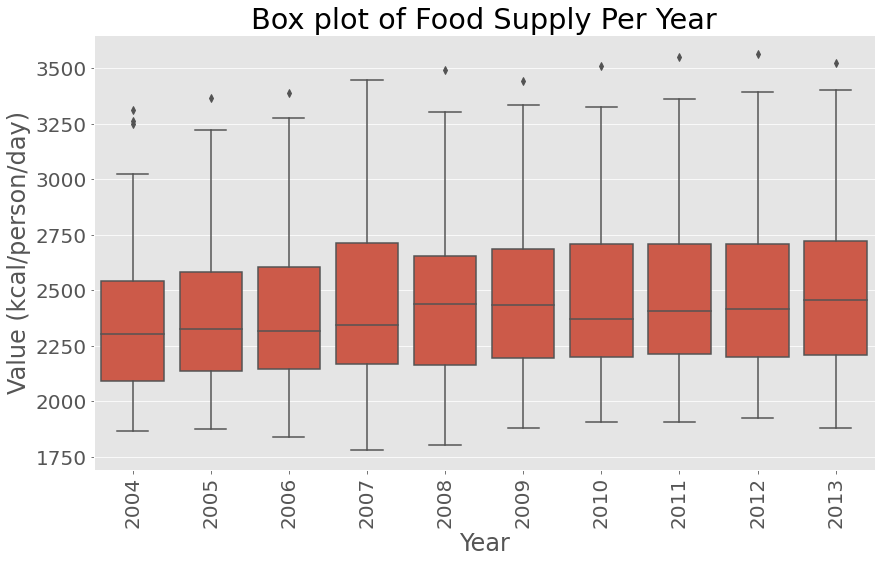

In [ ]:
#Data visualization of Africa food supply boxplot

plt.figure(figsize=[14, 8])

#label sizes for axes, xtick and ytick
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

base_color = sns.color_palette()[0]
sns.boxplot(data=Afri_food_supply, y='Value', x='Year', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Value (kcal/person/day)')
plt.title('Box plot of Food Supply Per Year');

###From the boxplot above, we could see that for example we have an outlier in 2012. 

In [ ]:
#Africa Food Supply data for the year 2012 
Afs_year_2012 = Afri_food_supply[Afri_food_supply['Year']==2012]
Afs_year_2012

Country  Year  Value             Unit
8                        Algeria  2012   3272  kcal/person/day
18                        Angola  2012   2384  kcal/person/day
28                         Benin  2012   2610  kcal/person/day
38                      Botswana  2012   2342  kcal/person/day
48                  Burkina Faso  2012   2707  kcal/person/day
58                    Cabo Verde  2012   2590  kcal/person/day
68                      Cameroon  2012   2622  kcal/person/day
78      Central African Republic  2012   2116  kcal/person/day
88                          Chad  2012   2124  kcal/person/day
98                         Congo  2012   2158  kcal/person/day
108                Cote d'Ivoire  2012   2780  kcal/person/day
118                     Djibouti  2012   2545  kcal/person/day
128                        Egypt  2012   3561  kcal/person/day
138                     Ethiopia  2012   2124  kcal/person/day
148                        Gabon  2012   2795  kcal/person/day
158                       Gambia  2012   2652  kcal/person/day
168                        Ghana  2012   3043  kcal/person/day
178                       Guinea  2012   2561  kcal/person/day
188                Guinea-Bissau  2012   2331  kcal/person/day
198                        Kenya  2012   2192  kcal/person/day
208                      Lesotho  2012   2547  kcal/person/day
218                      Liberia  2012   2200  kcal/person/day
228                   Madagascar  2012   2058  kcal/person/day
238                       Malawi  2012   2333  kcal/person/day
248                         Mali  2012   2860  kcal/person/day
258                   Mauritania  2012   2873  kcal/person/day
268                    Mauritius  2012   3014  kcal/person/day
278                      Morocco  2012   3366  kcal/person/day
288                   Mozambique  2012   2298  kcal/person/day
298                      Namibia  2012   2145  kcal/person/day
308                        Niger  2012   2567  kcal/person/day
318                      Nigeria  2012   2665  kcal/person/day
328                       Rwanda  2012   2270  kcal/person/day
338        Sao Tome and Principe  2012   2338  kcal/person/day
348                      Senegal  2012   2443  kcal/person/day
358                 Sierra Leone  2012   2374  kcal/person/day
368                 South Africa  2012   3014  kcal/person/day
378                        Sudan  2012   2323  kcal/person/day
388                    Swaziland  2012   2293  kcal/person/day
398                         Togo  2012   2414  kcal/person/day
408                      Tunisia  2012   3390  kcal/person/day
418                       Uganda  2012   2160  kcal/person/day
428  United Republic of Tanzania  2012   2192  kcal/person/day
438                       Zambia  2012   1923  kcal/person/day
448                     Zimbabwe  2012   2197  kcal/person/day

In [ ]:
#Statistical insight of the data
Afri_food_supply.groupby(['Year'])['Value'].median()



Year
2004    2301.0
2005    2327.0
2006    2314.0
2007    2342.0
2008    2439.0
2009    2435.0
2010    2370.0
2011    2407.0
2012    2414.0
2013    2456.0
Name: Value, dtype: float64

In [ ]:
Afri_food_supply.query('Year==2012')['Value'].median()

2414.0

In [ ]:
Afri_food_supply.query('Year==2012')['Value'].mean()

2528.133333333333

In [ ]:
Afri_food_supply.query('Year==2012')['Value'].describe()

count      45.000000
mean     2528.133333
std       388.188954
min      1923.000000
25%      2200.000000
50%      2414.000000
75%      2707.000000
max      3561.000000
Name: Value, dtype: float64

In [ ]:
#1st Quantile
Afri_food_supply.query('Year==2012')['Value'].quantile(0.25)

2200.0

In [ ]:
# getting our (IQR) interquatile range
Q3 = 2707.000000
Q1 = 2200.000000
IQR = Q3 -Q1
IQR


507.0

In [ ]:
lower_fence = Q1 -( 1.5 * IQR)
lower_fence

1439.5

In [ ]:
upper_fence = Q3 + ( 1.5 * IQR)
upper_fence

3467.5

In [ ]:
#Checking for outliers
#checking for values of country higer than lower fence 
Afs_year_2012[Afs_year_2012.Value < (Q1 - ( 1.5 * IQR))].any()

Country    False
Year       False
Value      False
Unit       False
dtype: bool

In [ ]:
#checking for values of country higher than upper fence 
Afs_year_2012[Afs_year_2012.Value < (Q1 + ( 1.5 * IQR))].any()

Country    True
Year       True
Value      True
Unit       True
dtype: bool

In [ ]:
#countries whose value is lower than the lower fence will output nothing
Afs_year_2012[Afs_year_2012.Value < (Q1 - ( 1.5 * IQR))]


Empty DataFrame
Columns: [Country, Year, Value, Unit]
Index: []

In [ ]:
#checking countries whose value is greater than the upper fence
Afs_year_2012[Afs_year_2012.Value > (Q1 + ( 1.5 * IQR))]

Country  Year  Value             Unit
8         Algeria  2012   3272  kcal/person/day
128         Egypt  2012   3561  kcal/person/day
168         Ghana  2012   3043  kcal/person/day
268     Mauritius  2012   3014  kcal/person/day
278       Morocco  2012   3366  kcal/person/day
368  South Africa  2012   3014  kcal/person/day
408       Tunisia  2012   3390  kcal/person/day

In [ ]:
#As seen above Egypt is the outlier country because it's value is higher than the upper fence value.

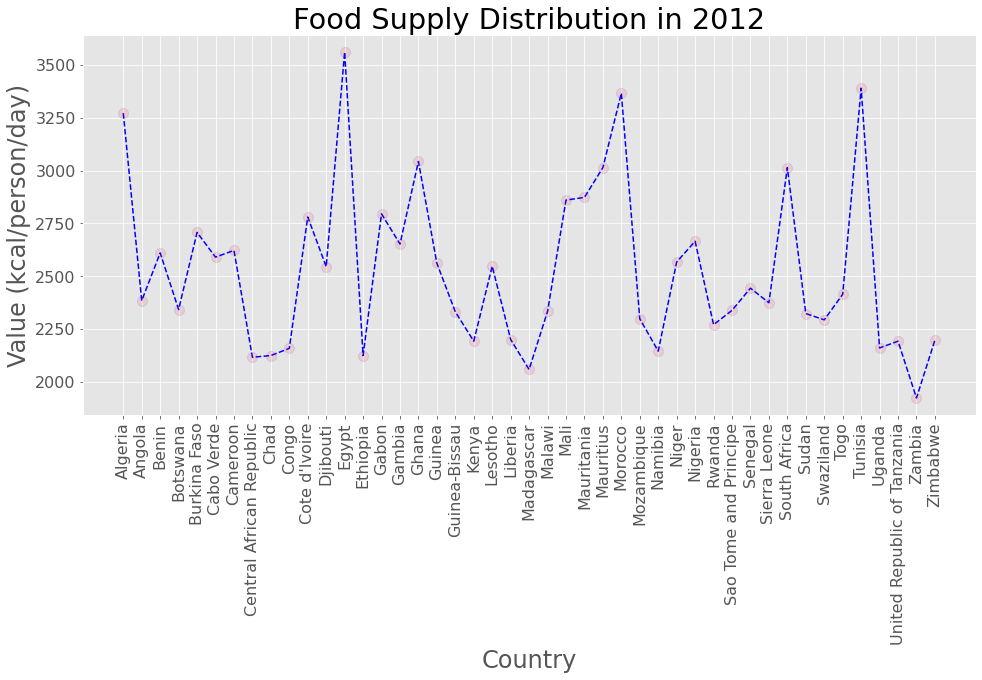

In [ ]:
#Data visualization of the Country that has outlier with line plot
px.line(Afs_year_2012, x = 'Country', y = 'Value', color ='Year', title = 'Box plot Africa Food Supply 2012',
        labels = {'Country': 'Country', 'Value':'Value (kcal/person/day)'})

value_2012 = Afs_year_2012['Value']
country_2012 = Afs_year_2012['Country']
plt.figure(figsize=[16, 7])

#label sizes for axes, xtick and ytick
plt.rc('font', size=20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

plt.plot(country_2012, value_2012,
    linewidth=1.5,
    linestyle='--',
    color='b',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
plt.xticks(rotation=90)
plt.title('Food Supply Distribution in 2012');
plt.ylabel('Value (kcal/person/day)')
plt.xlabel('Country');

### Clearly, Egypt is the exception. So, it is clear that Egypt had a lot more food accessible for consumption in 2012 than other African nations did.

##Hypothesis Testing of the Food Supply Data

The majority of the world's population eats rice, a carbohydrate meal. It is crucial to feeding the globe. According to the FAO, rice was actually the third most produced food in the world in 2014.

The globe is therefore fed with rice. But does Africa's population growth affect how much rice is produced there? In other words, is there a relationship between the continent of Africa's population and the amount of rice produced there (measured in kt)?

X: The average annual production of rice in African nations, measured in kt.

Y: That year's average population for African nations.

Based on the sample correlation coefficient, r, and the sample size n, we can use the Pearson hypothesis test to assess if the Pearson's correlation coefficient, (Greek small letter rho), is "near 0" or "substantially distant from 0".

We can define anything as "significant" if the test reveals it is considerably different from 0. However, we say that is "not significant" if the test finds that is not considerably off from (i.e., close to 0).

Does the population growth in African nations affect rice production?

We need to obtain our population dataset before moving on.

> Data obtained from the World Bank Open Data Portal will be used as the population dataset. The data contains population statistics for 267 nations between 1960 and 2021.

In [ ]:
#Loading the World Population dataset
population_dataset= pd.read_csv('/content/drive/MyDrive/My KaggleX Final Project/API_SP.POP.TOTL_DS2_en_csv_v2_4770387.csv', skiprows=[0,1,2,3])
population_dataset

Country Name Country Code     Indicator Name  \
0                          Aruba          ABW  Population, total   
1    Africa Eastern and Southern          AFE  Population, total   
2                    Afghanistan          AFG  Population, total   
3     Africa Western and Central          AFW  Population, total   
4                         Angola          AGO  Population, total   
..                           ...          ...                ...   
261                       Kosovo          XKX  Population, total   
262                  Yemen, Rep.          YEM  Population, total   
263                 South Africa          ZAF  Population, total   
264                       Zambia          ZMB  Population, total   
265                     Zimbabwe          ZWE  Population, total   

    Indicator Code         1960         1961         1962         1963  \
0      SP.POP.TOTL      54608.0      55811.0      56682.0      57475.0   
1      SP.POP.TOTL  130692579.0  134169237.0  137835590.0  141630546.0   
2      SP.POP.TOTL    8622466.0    8790140.0    8969047.0    9157465.0   
3      SP.POP.TOTL   97256290.0   99314028.0  101445032.0  103667517.0   
4      SP.POP.TOTL    5357195.0    5441333.0    5521400.0    5599827.0   
..             ...          ...          ...          ...          ...   
261    SP.POP.TOTL     947000.0     966000.0     994000.0    1022000.0   
262    SP.POP.TOTL    5542459.0    5646668.0    5753386.0    5860197.0   
263    SP.POP.TOTL   16520441.0   16989464.0   17503133.0   18042215.0   
264    SP.POP.TOTL    3119430.0    3219451.0    3323427.0    3431381.0   
265    SP.POP.TOTL    3806310.0    3925952.0    4049778.0    4177931.0   

            1964         1965  ...         2013         2014         2015  \
0        58178.0      58782.0  ...     102880.0     103594.0     104257.0   
1    145605995.0  149742351.0  ...  567891875.0  583650827.0  600008150.0   
2      9355514.0    9565147.0  ...   31541209.0   32716210.0   33753499.0   
3    105959979.0  108336203.0  ...  387204553.0  397855507.0  408690375.0   
4      5673199.0    5736582.0  ...   26147002.0   27128337.0   28127721.0   
..           ...          ...  ...          ...          ...          ...   
261    1050000.0    1078000.0  ...    1818117.0    1812771.0    1788196.0   
262    5973803.0    6097298.0  ...   26984002.0   27753304.0   28516545.0   
263   18603097.0   19187194.0  ...   53873616.0   54729551.0   55876504.0   
264    3542764.0    3658024.0  ...   15234976.0   15737793.0   16248230.0   
265    4310332.0    4447149.0  ...   13555422.0   13855753.0   14154937.0   

            2016         2017         2018         2019         2020  \
0       104874.0     105439.0     105962.0     106442.0     106585.0   
1    616377331.0  632746296.0  649756874.0  667242712.0  685112705.0   
2     34636207.0   35643418.0   36686784.0   37769499.0   38972230.0   
3    419778384.0  431138704.0  442646825.0  454306063.0  466189102.0   
4     29154746.0   30208628.0   31273533.0   32353588.0   33428486.0   
..           ...          ...          ...          ...          ...   
261    1777557.0    1791003.0    1797085.0    1788878.0    1790133.0   
262   29274002.0   30034389.0   30790513.0   31546691.0   32284046.0   
263   56422274.0   56641209.0   57339635.0   58087055.0   58801927.0   
264   16767761.0   17298054.0   17835893.0   18380477.0   18927715.0   
265   14452704.0   14751101.0   15052184.0   15354608.0   15669666.0   

            2021  Unnamed: 66  
0       106537.0          NaN  
1    702976832.0          NaN  
2     40099462.0          NaN  
3    478185907.0          NaN  
4     34503774.0          NaN  
..           ...          ...  
261    1786038.0          NaN  
262   32981641.0          NaN  
263   59392255.0          NaN  
264   19473125.0          NaN  
265   15993524.0          NaN  

[266 rows x 67 columns]

In [ ]:
population_dataset.T

0                            1    \
Country Name                Aruba  Africa Eastern and Southern   
Country Code                  ABW                          AFE   
Indicator Name  Population, total            Population, total   
Indicator Code        SP.POP.TOTL                  SP.POP.TOTL   
1960                      54608.0                  130692579.0   
...                           ...                          ...   
2018                     105962.0                  649756874.0   
2019                     106442.0                  667242712.0   
2020                     106585.0                  685112705.0   
2021                     106537.0                  702976832.0   
Unnamed: 66                   NaN                          NaN   

                              2                           3    \
Country Name          Afghanistan  Africa Western and Central   
Country Code                  AFG                         AFW   
Indicator Name  Population, total           Population, total   
Indicator Code        SP.POP.TOTL                 SP.POP.TOTL   
1960                    8622466.0                  97256290.0   
...                           ...                         ...   
2018                   36686784.0                 442646825.0   
2019                   37769499.0                 454306063.0   
2020                   38972230.0                 466189102.0   
2021                   40099462.0                 478185907.0   
Unnamed: 66                   NaN                         NaN   

                              4                  5                  6    \
Country Name               Angola            Albania            Andorra   
Country Code                  AGO                ALB                AND   
Indicator Name  Population, total  Population, total  Population, total   
Indicator Code        SP.POP.TOTL        SP.POP.TOTL        SP.POP.TOTL   
1960                    5357195.0          1608800.0             9443.0   
...                           ...                ...                ...   
2018                   31273533.0          2866376.0            75013.0   
2019                   32353588.0          2854191.0            76343.0   
2020                   33428486.0          2837849.0            77700.0   
2021                   34503774.0          2811666.0            79034.0   
Unnamed: 66                   NaN                NaN                NaN   

                              7                     8                  9    \
Country Name           Arab World  United Arab Emirates          Argentina   
Country Code                  ARB                   ARE                ARG   
Indicator Name  Population, total     Population, total  Population, total   
Indicator Code        SP.POP.TOTL           SP.POP.TOTL        SP.POP.TOTL   
1960                   93359407.0              133426.0         20349744.0   
...                           ...                   ...                ...   
2018                  432545676.0             9140169.0         44494502.0   
2019                  441467739.0             9211657.0         44938712.0   
2020                  449228296.0             9287289.0         45376763.0   
2021                  456520777.0             9365145.0         45808747.0   
Unnamed: 66                   NaN                   NaN                NaN   

                ...                    256                257  \
Country Name    ...  Virgin Islands (U.S.)            Vietnam   
Country Code    ...                    VIR                VNM   
Indicator Name  ...      Population, total  Population, total   
Indicator Code  ...            SP.POP.TOTL        SP.POP.TOTL   
1960            ...                32500.0         32718461.0   
...             ...                    ...                ...   
2018            ...               107001.0         94914330.0   
2019            ...               106669.0         95776716.0   
2020            ...              

In [ ]:
population_dataset.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

In [ ]:
#Droping unwanted coloumns
#Need data from year 2004 to 2013
#Needed only the data for the 45 African countries we've been working with in the food production and food supply dataset
population_dataset.drop(['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021','Unnamed: 66'], axis=1, inplace=True)
    

In [ ]:
population_dataset

Country Name         2004         2005         2006  \
0                          Aruba      93540.0      94483.0      95606.0   
1    Africa Eastern and Southern  445281555.0  457153837.0  469508516.0   
2                    Afghanistan   23553551.0   24411191.0   25442944.0   
3     Africa Western and Central  301265247.0  309824829.0  318601484.0   
4                         Angola   18771125.0   19450959.0   20162340.0   
..                           ...          ...          ...          ...   
261                       Kosovo    1704622.0    1705780.0    1719536.0   
262                  Yemen, Rep.   20733406.0   21320671.0   21966298.0   
263                 South Africa   48556071.0   49017147.0   49491756.0   
264                       Zambia   11188040.0   11564870.0   11971567.0   
265                     Zimbabwe   12160881.0   12224753.0   12330490.0   

            2007         2008         2009         2010         2011  \
0        96787.0      97996.0      99212.0     100341.0     101288.0   
1    482406426.0  495748900.0  509410477.0  523459657.0  537792950.0   
2     25903301.0   26427199.0   27385307.0   28189672.0   29249157.0   
3    327612838.0  336893835.0  346475221.0  356337762.0  366489204.0   
4     20909684.0   21691522.0   22507674.0   23364185.0   24259111.0   
..           ...          ...          ...          ...          ...   
261    1733404.0    1747383.0    1761474.0    1775680.0    1791000.0   
262   22641538.0   23329004.0   24029589.0   24743946.0   25475610.0   
263   49996094.0   50565812.0   51170779.0   51784921.0   52443325.0   
264   12402073.0   12852966.0   13318087.0   13792086.0   14265814.0   
265   12450568.0   12550347.0   12679810.0   12839771.0   13025785.0   

            2012         2013  
0       102112.0     102880.0  
1    552530654.0  567891875.0  
2     30466479.0   31541209.0  
3    376797999.0  387204553.0  
4     25188292.0   26147002.0  
..           ...          ...  
261    1807106.0    1818117.0  
262   26223391.0   26984002.0  
263   53145033.0   53873616.0  
264   14744658.0   15234976.0  
265   13265331.0   13555422.0  

[266 rows x 11 columns]

In [ ]:
#Using the food production dataset to verify the names of the 45 African countries that we have been working with.
Afri_food_prod['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Togo',
       'Tunisia', 'Uganda', 'United Republic of Tanzania', 'Zambia',
       'Zimbabwe'], dtype=object)

In [ ]:
#Making a list with the first 45 African nations from above
Afri_food_prod_country_list = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Ethiopia', 'Gabon','Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Togo','Tunisia', 'Uganda', 'United Republic of Tanzania', 'Zambia',
'Zimbabwe']

In [ ]:
#Building a dataframe with the Africa Food Production country list solely containing the names of African nations
african_population = population_dataset[population_dataset['Country Name'].isin(Afri_food_prod_country_list)]
african_population

Country Name         2004         2005         2006  \
4                      Angola   18771125.0   19450959.0   20162340.0   
18                      Benin    7894554.0    8149419.0    8402631.0   
19               Burkina Faso   13445977.0   13876127.0   14316242.0   
33                   Botswana    1859085.0    1892807.0    1928704.0   
34   Central African Republic    4115138.0    4208834.0    4294352.0   
41              Cote d'Ivoire   18544903.0   18970215.0   19394057.0   
42                   Cameroon   16809407.0   17275171.0   17751333.0   
47                 Cabo Verde     486583.0     492827.0     498884.0   
56                   Djibouti     818373.0     830861.0     846947.0   
60                    Algeria   32510186.0   32956690.0   33435080.0   
72                   Ethiopia   75301026.0   77469940.0   79691050.0   
80                      Gabon    1417110.0    1458353.0    1502534.0   
83                      Ghana   21906444.0   22496951.0   23098586.0   
85                     Guinea    8961039.0    9140114.0    9330625.0   
87              Guinea-Bissau    1347009.0    1379713.0    1414091.0   
121                     Kenya   34791836.0   35843010.0   36925253.0   
131                   Liberia    3122447.0    3266318.0    3455397.0   
141                   Lesotho    1985384.0    1977424.0    1976780.0   
148                   Morocco   30033125.0   30431902.0   30833022.0   
151                Madagascar   18250774.0   18792171.0   19350299.0   
158                      Mali   12751995.0   13180551.0   13623541.0   
165                Mozambique   19694411.0   20211114.0   20735982.0   
166                Mauritania    2946575.0    3012360.0    3081229.0   
167                 Mauritius    1221003.0    1228254.0    1233996.0   
168                    Malawi   12411342.0   12755648.0   13118307.0   
171                   Namibia    1939406.0    1962865.0    1986558.0   
173                     Niger   13366885.0   13855221.0   14365168.0   
174                   Nigeria  136756848.0  140490722.0  144329764.0   
203                    Rwanda    8791853.0    9026299.0    9270066.0   
206                     Sudan   28831550.0   29540577.0   30332968.0   
207                   Senegal   10698691.0   10974057.0   11263387.0   
210              Sierra Leone    5533329.0    5683334.0    5809774.0   
219     Sao Tome and Principe     157697.0     161680.0     165725.0   
229                      Chad    9613503.0   10005012.0   10365614.0   
232                      Togo    5565218.0    5711597.0    5874240.0   
243                   Tunisia   10292225.0   10388344.0   10483558.0   
247                    Uganda   27146084.0   27946588.0   28773227.0   
263              South Africa   48556071.0   49017147.0   49491756.0   
264                    Zambia   11188040.0   11564870.0   11971567.0   
265                  Zimbabwe   12160881.0   12224753.0   12330490.0   

            2007         2008         2009         2010         2011  \
4     20909684.0   21691522.0   22507674.0   23364185.0   24259111.0   
18     8647761.0    8906469.0    9172514.0    9445710.0    9726380.0   
19    14757074.0   15197915.0   15650022.0   16116845.0   16602651.0   
33     1966977.0    2007320.0    2048997.0    2091664.0    2134037.0   
34     4375569.0    4467233.0    4564540.0    4660067.0    4732022.0   
41    19817700.0   20244449.0   20677762.0   21120042.0   21562914.0   
42    18251866.0   18777081.0   19319274.0   19878036.0   20448873.0   
47      504733.0     510336.0     515638.0     521212.0     527521.0   
56      865196.0     882886.0     901103.0     919199.0     936811.0   
60    33983827.0   34569592.0   35196037.0   35856344.0   36543541.0   
72    81996185.0   84357105.0   86755585.0   89237791.0   91817929.0   
80     1549774.0    1599978.0    1653542.0    1711105.0    1772500.0   
83    23708320.0   24326087.0   24950762.0   25574719.0   26205941.0   
85     9547082.0    9779785.0   10021323.0   10270728.0 

In [ ]:
#Making a copy of the african population dataset
african_pop = african_population.copy()

In [ ]:
#Examining and classifying the names of the nations in our final population dataframe
african_pop_list = african_pop['Country Name'].unique()
african_pop_list

array(['Angola', 'Benin', 'Burkina Faso', 'Botswana',
       'Central African Republic', "Cote d'Ivoire", 'Cameroon',
       'Cabo Verde', 'Djibouti', 'Algeria', 'Ethiopia', 'Gabon', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Liberia', 'Lesotho',
       'Morocco', 'Madagascar', 'Mali', 'Mozambique', 'Mauritania',
       'Mauritius', 'Malawi', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sudan', 'Senegal', 'Sierra Leone', 'Sao Tome and Principe',
       'Chad', 'Togo', 'Tunisia', 'Uganda', 'South Africa', 'Zambia',
       'Zimbabwe'], dtype=object)

In [ ]:
african_pop['Country Name'].nunique()

40

In [ ]:
#Noticed we have 40 Africa countries as against the 45 countries in our previous food prodcution dataset
#Lets dig further to find out more
african_pop_list == Afri_food_prod_country_list


False

In [ ]:
#Using a function to compare lists
def compare(african_pop_list, Afri_food_prod_country_list):
    if len(african_pop_list) != len(Afri_food_prod_country_list):
      african_pop_list.sort()
    Afri_food_prod_country_list.sort() 
    if african_pop_list == Afri_food_prod_country_list: 
      return True
    else:
      return False

compare(african_pop_list, Afri_food_prod_country_list)

False

In [ ]:
#By comparing the two lists of populations, printing the names of the nations that are absent
print(set(african_pop_list) ^ set(Afri_food_prod_country_list))


{'Swaziland', 'Egypt', 'Congo', 'Gambia', 'United Republic of Tanzania'}


Swaziland, Gambia, United Republic of Tanzania, Egypt, and Congo are the five nations that are listed in the Afri_food_ prod_country_list but not in the afri_food_pop list.

Before performing our hypthesis testing, the data for these nations will be removed from our food production data.

creating a copy of the food production dataset in order to remove the additional five countries that are present there but are absent from the population dataset.

In [ ]:
Afri_food_production = Afri_food_prod.copy()
Afri_food_production

Country                Item  Year  Value Unit
0       Algeria  Wheat and products  2004   2731   kt
1       Algeria  Wheat and products  2005   2415   kt
2       Algeria  Wheat and products  2006   2688   kt
3       Algeria  Wheat and products  2007   2319   kt
4       Algeria  Wheat and products  2008   1111   kt
...         ...                 ...   ...    ...  ...
23105  Zimbabwe         Crustaceans  2009      0   kt
23106  Zimbabwe         Crustaceans  2010      0   kt
23107  Zimbabwe         Crustaceans  2011      0   kt
23108  Zimbabwe         Crustaceans  2012      0   kt
23109  Zimbabwe         Crustaceans  2013      0   kt

[23110 rows x 5 columns]

In [ ]:
#To make the number of countries match the amount in our population list, the extra five countries should be eliminated.
indexNames = Afri_food_production[(Afri_food_production['Country'] == 'Egypt') | (Afri_food_production['Country'] == 'Congo') | 
                             (Afri_food_production['Country'] == 'Swaziland') | (Afri_food_production['Country'] == 'Gambia') | 
                             (Afri_food_production['Country'] == 'United Republic of Tanzania')].index
Afri_food_production.drop(indexNames, inplace=True)
Afri_food_production


Country                Item  Year  Value Unit
0       Algeria  Wheat and products  2004   2731   kt
1       Algeria  Wheat and products  2005   2415   kt
2       Algeria  Wheat and products  2006   2688   kt
3       Algeria  Wheat and products  2007   2319   kt
4       Algeria  Wheat and products  2008   1111   kt
...         ...                 ...   ...    ...  ...
23105  Zimbabwe         Crustaceans  2009      0   kt
23106  Zimbabwe         Crustaceans  2010      0   kt
23107  Zimbabwe         Crustaceans  2011      0   kt
23108  Zimbabwe         Crustaceans  2012      0   kt
23109  Zimbabwe         Crustaceans  2013      0   kt

[20340 rows x 5 columns]

In [ ]:
#the number of countries
Afri_food_production.nunique()

Country      40
Item         94
Year         10
Value      1911
Unit          1
dtype: int64

In [ ]:
#Assigning the list of countries to a list
List = Afri_food_production['Country'].unique()
# Now checking to ascertain if the list of countries matches with the population list
List == african_pop_list

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Our list of nations by food production is now finally equal to our list of nations by population. They both currently share the same list of 40 nations.

In [ ]:
african_pop.head()

Country Name        2004        2005        2006        2007  \
4                     Angola  18771125.0  19450959.0  20162340.0  20909684.0   
18                     Benin   7894554.0   8149419.0   8402631.0   8647761.0   
19              Burkina Faso  13445977.0  13876127.0  14316242.0  14757074.0   
33                  Botswana   1859085.0   1892807.0   1928704.0   1966977.0   
34  Central African Republic   4115138.0   4208834.0   4294352.0   4375569.0   

          2008        2009        2010        2011        2012        2013  
4   21691522.0  22507674.0  23364185.0  24259111.0  25188292.0  26147002.0  
18   8906469.0   9172514.0   9445710.0   9726380.0  10014078.0  10308730.0  
19  15197915.0  15650022.0  16116845.0  16602651.0  17113732.0  17636408.0  
33   2007320.0   2048997.0   2091664.0   2134037.0   2175425.0   2217278.0  
34   4467233.0   4564540.0   4660067.0   4732022.0   4773306.0   4802428.0

In [ ]:
#Group the years under the Year column, and the population for each year under the value column, after melting the columns by using .melt method.
african_pop = pd.melt(african_pop, id_vars=['Country Name'],var_name='Year')
african_pop


Country Name  Year       value
0                      Angola  2004  18771125.0
1                       Benin  2004   7894554.0
2                Burkina Faso  2004  13445977.0
3                    Botswana  2004   1859085.0
4    Central African Republic  2004   4115138.0
..                        ...   ...         ...
395                   Tunisia  2013  11300284.0
396                    Uganda  2013  35273570.0
397              South Africa  2013  53873616.0
398                    Zambia  2013  15234976.0
399                  Zimbabwe  2013  13555422.0

[400 rows x 3 columns]

In [ ]:
#Mean population each year
african_pop = african_pop.groupby('Year').mean()
african_pop

value
Year              
2004  1.729988e+07
2005  1.773252e+07
2006  1.818038e+07
2007  1.864532e+07
2008  1.912565e+07
2009  1.962065e+07
2010  2.012751e+07
2011  2.064788e+07
2012  2.118110e+07
2013  2.172375e+07

In [ ]:
#In order to obtain the data for rice production, we will also use the production of rice to do the hypothesis testing.
Afri_rice_production = Afri_food_production[Afri_food_production.Item == 'Rice (Milled Equivalent)']
Afri_rice_production


Country                      Item  Year  Value Unit
10      Algeria  Rice (Milled Equivalent)  2004      0   kt
11      Algeria  Rice (Milled Equivalent)  2005      0   kt
12      Algeria  Rice (Milled Equivalent)  2006      0   kt
13      Algeria  Rice (Milled Equivalent)  2007      0   kt
14      Algeria  Rice (Milled Equivalent)  2008      0   kt
...         ...                       ...   ...    ...  ...
22485  Zimbabwe  Rice (Milled Equivalent)  2009      0   kt
22486  Zimbabwe  Rice (Milled Equivalent)  2010      0   kt
22487  Zimbabwe  Rice (Milled Equivalent)  2011      0   kt
22488  Zimbabwe  Rice (Milled Equivalent)  2012      0   kt
22489  Zimbabwe  Rice (Milled Equivalent)  2013      0   kt

[330 rows x 5 columns]

In [ ]:
#To find the average amount of rice produced each year
Afri_rice_production = Afri_rice_production.groupby('Year').mean()
Afri_rice_production

Value
Year            
2004  225.818182
2005  253.787879
2006  274.848485
2007  249.878788
2008  307.818182
2009  327.151515
2010  383.454545
2011  361.757576
2012  398.484848
2013  402.272727

**Using the Perason Correlatation Test:**

X: The average annual production of rice in African nations, measured in kt.

Y: That year's average population for African nations.

In [ ]:
#Asigning the Afri_rice_production to X and african_pop to Y
X = Afri_rice_production.copy()
Y = african_pop.copy()

> ### **Conclusion**

>What is Africa food production trend overtime?

The trend of food production in Africa has been on a steady incline over the past few decades. However, there was production decrease in 2007 and thereafter an increase in 2008 up to 2013.

There has also been an increase in food supply in Africa between 2004 and 2013 as the year increases.


>What are the top 10 Africa most produced food?

The top 10 most produced food in Africa between 2004 and 2013 are Cassava, Sugar Cane, Maize and products like, Yam, Vegtables, Milk (excluding butter), Sorghum and Products, Wheat and Products, Beverages, Fermented and Potatoes.

>What country has the most produced food in Africa?

Nigeria has the highest food production in Africa with a value of 54,000 kiloton of food production in 2012, 52,000 kiloton in 2011 and 53,000 kiloton in 2013 than any other Africa country.

>What country has the most supplied food in Africa?

Egypt had a lot more food accessible for consumption in 2012 than other African nations per capita between 2004 and 2013, despite the fact that Nigeria, Egypt, and South Africa were the top three food producing nations between those years


**Recommendation for further Analysis:** 

-Using the Perason Correlatation Test to get more statistical insights from the datasets.

-Feature Engineering.

-Data Modelling.

-Data validation and testing.

-Making Predictions.


**References**
1. (https://www.kaggle.com/datasets/emmanuelonuoha/africas-food-production-and-supply-2004-

2. https://data.worldbank.org/indicator/SP.POP.TOTL

3. https://www.fao.org/3/y5109E/y5109e0e.htm

**Acknowledgement**

I am incredibly grateful for the opportunity to be part of the BIPOC KaggleX program cohort 2022 and have been immensely lucky to have had an amazing mentor (Ayman Mahmoud) throughout this journey. I would like to express my utmost gratitude towards my mentor, who has not only guided me through every step but also imparted invaluable knowledge that has helped shape me as a professional. Additionally, I am thankful to mentor Abdulwasiu Tiamiyu who painstakenly went through my codes and made some great inputs and many thanks to other mentees (especially Kehinde, Divine and Favour) who have provided invaluable insights into various aspects of data science. This experience will stay with me forever!